<a href="https://colab.research.google.com/github/amathie5/projet-breast-cancer/blob/main/datascience_project_breastcancer_v7_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
#CSV files importation
df1 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df3.csv')

#Concatening all dataframes together to be left with one unique dataframe
df = pd.concat([df1,df2,df3]).sort_values(by='year')
df_encoded = df.copy()

#Displaying the head of the dataset
display(df.head())

# Number of variables (columns)
num_variables = df.shape[1]

# Number of observations (lines)
num_observations = df.shape[0]

# Total number of values
total_values = df.size  # équivalent à num_variables * num_observations

# Affichage
print(f'The dataset contains a total of {num_variables} variables and {num_observations} observations, for a total of {total_values} values')
print(f'The dataset contains no null value and every variable is of type int64')
display(df.info())



,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,1,1,0,1,0,2,0,1,1,0,0,1
19,2005,1,1,0,0,9,4,0,1,9,9,9,1
18,2005,1,1,0,0,9,4,0,1,1,0,0,1
7,2005,1,1,0,0,4,2,0,1,1,0,0,1
6,2005,1,1,0,0,2,3,0,1,9,0,0,1


The dataset contains a total of 13 variables and 1522340 observations, for a total of 19790420 values
The dataset contains no null value and every variable is of type int64
<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   year                   1522340 non-null  int64
 1   age_group_5_years      1522340 non-null  int64
 2   race_eth               1522340 non-null  int64
 3   first_degree_hx        1522340 non-null  int64
 4   age_menarche           1522340 non-null  int64
 5   age_first_birth        1522340 non-null  int64
 6   BIRADS_breast_density  1522340 non-null  int64
 7   current_hrt            1522340 non-null  int64
 8   menopaus               1522340 non-null  int64
 9   bmi_group              1522340 non-null  int64
 10  biophx                 1522340 non-null  int64
 11  breast_cancer_history  1522340 non-nul

None

In [ ]:
age_map = {1:'18-29',2:'30-34',3:'35-39',4:'40-44',5:'45-49',6:'50-54',7:'55-59',8:'60-64',9:'65-69',10:'70-74',11:'75-79',12:'80-84',13:'85+'}
race_map = {1:'non-hispanic white', 2:'non-hispanic black', 3:'asian/pacific islander', 4:'native american',5:'hispanic',6:'other/mixed',9:'unknown'}
familyhx_map = {0:'no', 1:'yes', 9:'unknown'}
menarche_map = {0:'14+',1:'12-13',2:'<12',9:'unknown'}
firstbirth_map = {0:'<20',1:'20-24',2:'25-29',3:'30+',4:'nulliparous',9:'unknown'}
BIRADS_map = {1:'fatty',2:'scattered',3:'heterogeneously dense', 4:'extremely dense', 5:'unknown'}
hrt_map = {0:'no', 1:'yes',9:'unknown'}
menopaus_map = {1:'pre-menopausal',2:'post-menopausal',3:'surgical menopause', 9:'unknown'}
bmi_map = {1:'10-24.99',2:'25-29.99',3:'30-34.99',4:'35+',9:'unknown'}
biophx_map = {0:'no',1:'yes', 9:'unknown'}
history_map = {0:'no',1:'yes',9:'unknown'}

#Replacing the code with the categories
df['age_group_5_years']=df['age_group_5_years'].map(age_map)
df['race_eth']=df['race_eth'].map(race_map)
df['first_degree_hx']=df['first_degree_hx'].map(familyhx_map)
df['age_menarche']=df['age_menarche'].map(age_map)
df['age_first_birth']=df['age_first_birth'].map(firstbirth_map)
df['BIRADS_breast_density']=df['BIRADS_breast_density'].map(BIRADS_map)
df['current_hrt']=df['current_hrt'].map(hrt_map)
df['menopaus']=df['menopaus'].map(menopaus_map)
df['bmi_group']=df['bmi_group'].map(bmi_map)
df['biophx']=df['biophx'].map(biophx_map)
df['breast_cancer_history']=df['breast_cancer_history'].map(history_map)

#convert as category
cat_cols = ['age_group_5_years','race_eth','first_degree_hx','age_menarche','age_first_birth','BIRADS_breast_density','current_hrt','menopaus','bmi_group','biophx','breast_cancer_history']
df[cat_cols] = df[cat_cols].astype('category')
display(df.head())
df.info()
df.isna().sum()




,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1
19,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,unknown,unknown,unknown,1
18,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,10-24.99,no,no,1
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,unknown,no,no,1


<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   year                   1522340 non-null  int64   
 1   age_group_5_years      1522340 non-null  category
 2   race_eth               1522340 non-null  category
 3   first_degree_hx        1522340 non-null  category
 4   age_menarche           1265795 non-null  category
 5   age_first_birth        1522340 non-null  category
 6   BIRADS_breast_density  1343329 non-null  category
 7   current_hrt            1522340 non-null  category
 8   menopaus               1522340 non-null  category
 9   bmi_group              1522340 non-null  category
 10  biophx                 1522340 non-null  category
 11  breast_cancer_history  1522340 non-null  category
 12  count                  1522340 non-null  int64   
dtypes: category(11), int64(2)
memory usage: 50.8 MB


,0
year,0
age_group_5_years,0
race_eth,0
first_degree_hx,0
age_menarche,256545
age_first_birth,0
BIRADS_breast_density,179011
current_hrt,0
menopaus,0
bmi_group,0


In [ ]:
#replace unknown values by nan
df = df.replace('unknown',np.nan)

#check for duplicates
print(df.duplicated().sum())

#the total number of observations should be 6'788'436
print(df['count'].sum())


/tmp/ipython-input-3569221684.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace('unknown',np.nan)


0
6788436


In [ ]:
#create two binary variables for high BIRADS and cancer history
df['BIRADS_high']=np.where(df_encoded['BIRADS_breast_density'].isin([3,4]),1,0)
df['breast_cancer_history_bin']=np.where(df_encoded['breast_cancer_history']==1,1,0)

#check the distribution
display(df['BIRADS_high'])
display(df['breast_cancer_history_bin'])

display(df.head())

,BIRADS_high
20,0
19,1
18,1
7,0
6,1
...,...
411304,1
411303,1
411302,1
411301,1


,breast_cancer_history_bin
20,0
19,0
18,0
7,0
6,0
...,...
411304,0
411303,0
411302,0
411301,0


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
19,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,NaN,NaN,NaN,1,1,0
18,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,10-24.99,no,no,1,1,0
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,NaN,no,no,1,1,0


In [ ]:
#check types and unique values
for col in cat_cols:
  print(col, ':',df[col].unique())

age_group_5_years : ['18-29', '85+', '30-34', '35-39', '40-44', ..., '60-64', '65-69', '70-74', '75-79', '80-84']
Length: 13
Categories (13, object): ['18-29', '30-34', '35-39', '40-44', ..., '70-74', '75-79', '80-84', '85+']
race_eth : ['non-hispanic white', NaN, 'non-hispanic black', 'asian/pacific islander', 'hispanic', 'native american', 'other/mixed']
Categories (6, object): ['asian/pacific islander', 'hispanic', 'native american', 'non-hispanic black',
                         'non-hispanic white', 'other/mixed']
first_degree_hx : ['no', NaN, 'yes']
Categories (2, object): ['no', 'yes']
age_menarche : ['18-29', NaN, '65-69', '30-34']
Categories (3, object): ['18-29', '30-34', '65-69']
age_first_birth : ['<20', NaN, 'nulliparous', '25-29', '20-24', '30+']
Categories (5, object): ['20-24', '25-29', '30+', '<20', 'nulliparous']
BIRADS_breast_density : ['scattered', 'extremely dense', 'heterogeneously dense', NaN, 'fatty']
Categories (4, object): ['extremely dense', 'fatty', 'heterog

In [ ]:
df_cleaned = df.dropna()
df_cleaned.info()
display(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 421880 entries, 20 to 411307
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   year                       421880 non-null  int64   
 1   age_group_5_years          421880 non-null  category
 2   race_eth                   421880 non-null  category
 3   first_degree_hx            421880 non-null  category
 4   age_menarche               421880 non-null  category
 5   age_first_birth            421880 non-null  category
 6   BIRADS_breast_density      421880 non-null  category
 7   current_hrt                421880 non-null  category
 8   menopaus                   421880 non-null  category
 9   bmi_group                  421880 non-null  category
 10  biophx                     421880 non-null  category
 11  breast_cancer_history      421880 non-null  category
 12  count                      421880 non-null  int64   
 13  BIRADS_high       

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
51,2005,18-29,non-hispanic white,no,30-34,<20,scattered,no,pre-menopausal,30-34.99,no,no,1,0,0
50,2005,18-29,non-hispanic white,no,30-34,<20,scattered,no,pre-menopausal,25-29.99,no,no,1,0,0
39,2005,18-29,non-hispanic white,no,18-29,nulliparous,extremely dense,no,pre-menopausal,25-29.99,yes,no,1,1,0
82,2005,18-29,non-hispanic white,no,65-69,<20,extremely dense,no,pre-menopausal,10-24.99,yes,no,1,1,0


In [ ]:

df_cleaned_descr = df_cleaned.describe(include = 'all')
df_cleaned_descr['year'] = df_cleaned_descr['year'].round(0)
display(df_cleaned_descr)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
count,421880.0,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880.000000,421880.000000,421880.000000
unique,NaN,13,6,2,3,5,4,2,3,4,2,2,NaN,NaN,NaN
top,NaN,50-54,non-hispanic white,no,65-69,nulliparous,scattered,no,post-menopausal,10-24.99,no,no,NaN,NaN,NaN
freq,NaN,69695,209934,287325,182648,96413,153474,377381,255542,128765,245154,352596,NaN,NaN,NaN
mean,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.513696,0.477465,0.164227
std,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.043819,0.499493,0.370482
min,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
75%,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,0.000000


Certaines combinaisons reviennent très fréquemment (1093 fois) alors que certains ne sont présente que une fois. En moyenne les combinaisons apparaissent 5,5 fois.
En moyenne 47,75% des femmes ont une densité mammaire élevée et 16,42% ont été diagnostiquées avec un cancer dans le passé.

/tmp/ipython-input-2332139267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned_agg = df_cleaned.groupby(cat_cols, as_index=False)['count'].sum()


,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,no,no,0
1,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,no,yes,0
2,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,yes,no,0
3,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,yes,yes,0
4,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,25-29.99,no,no,0


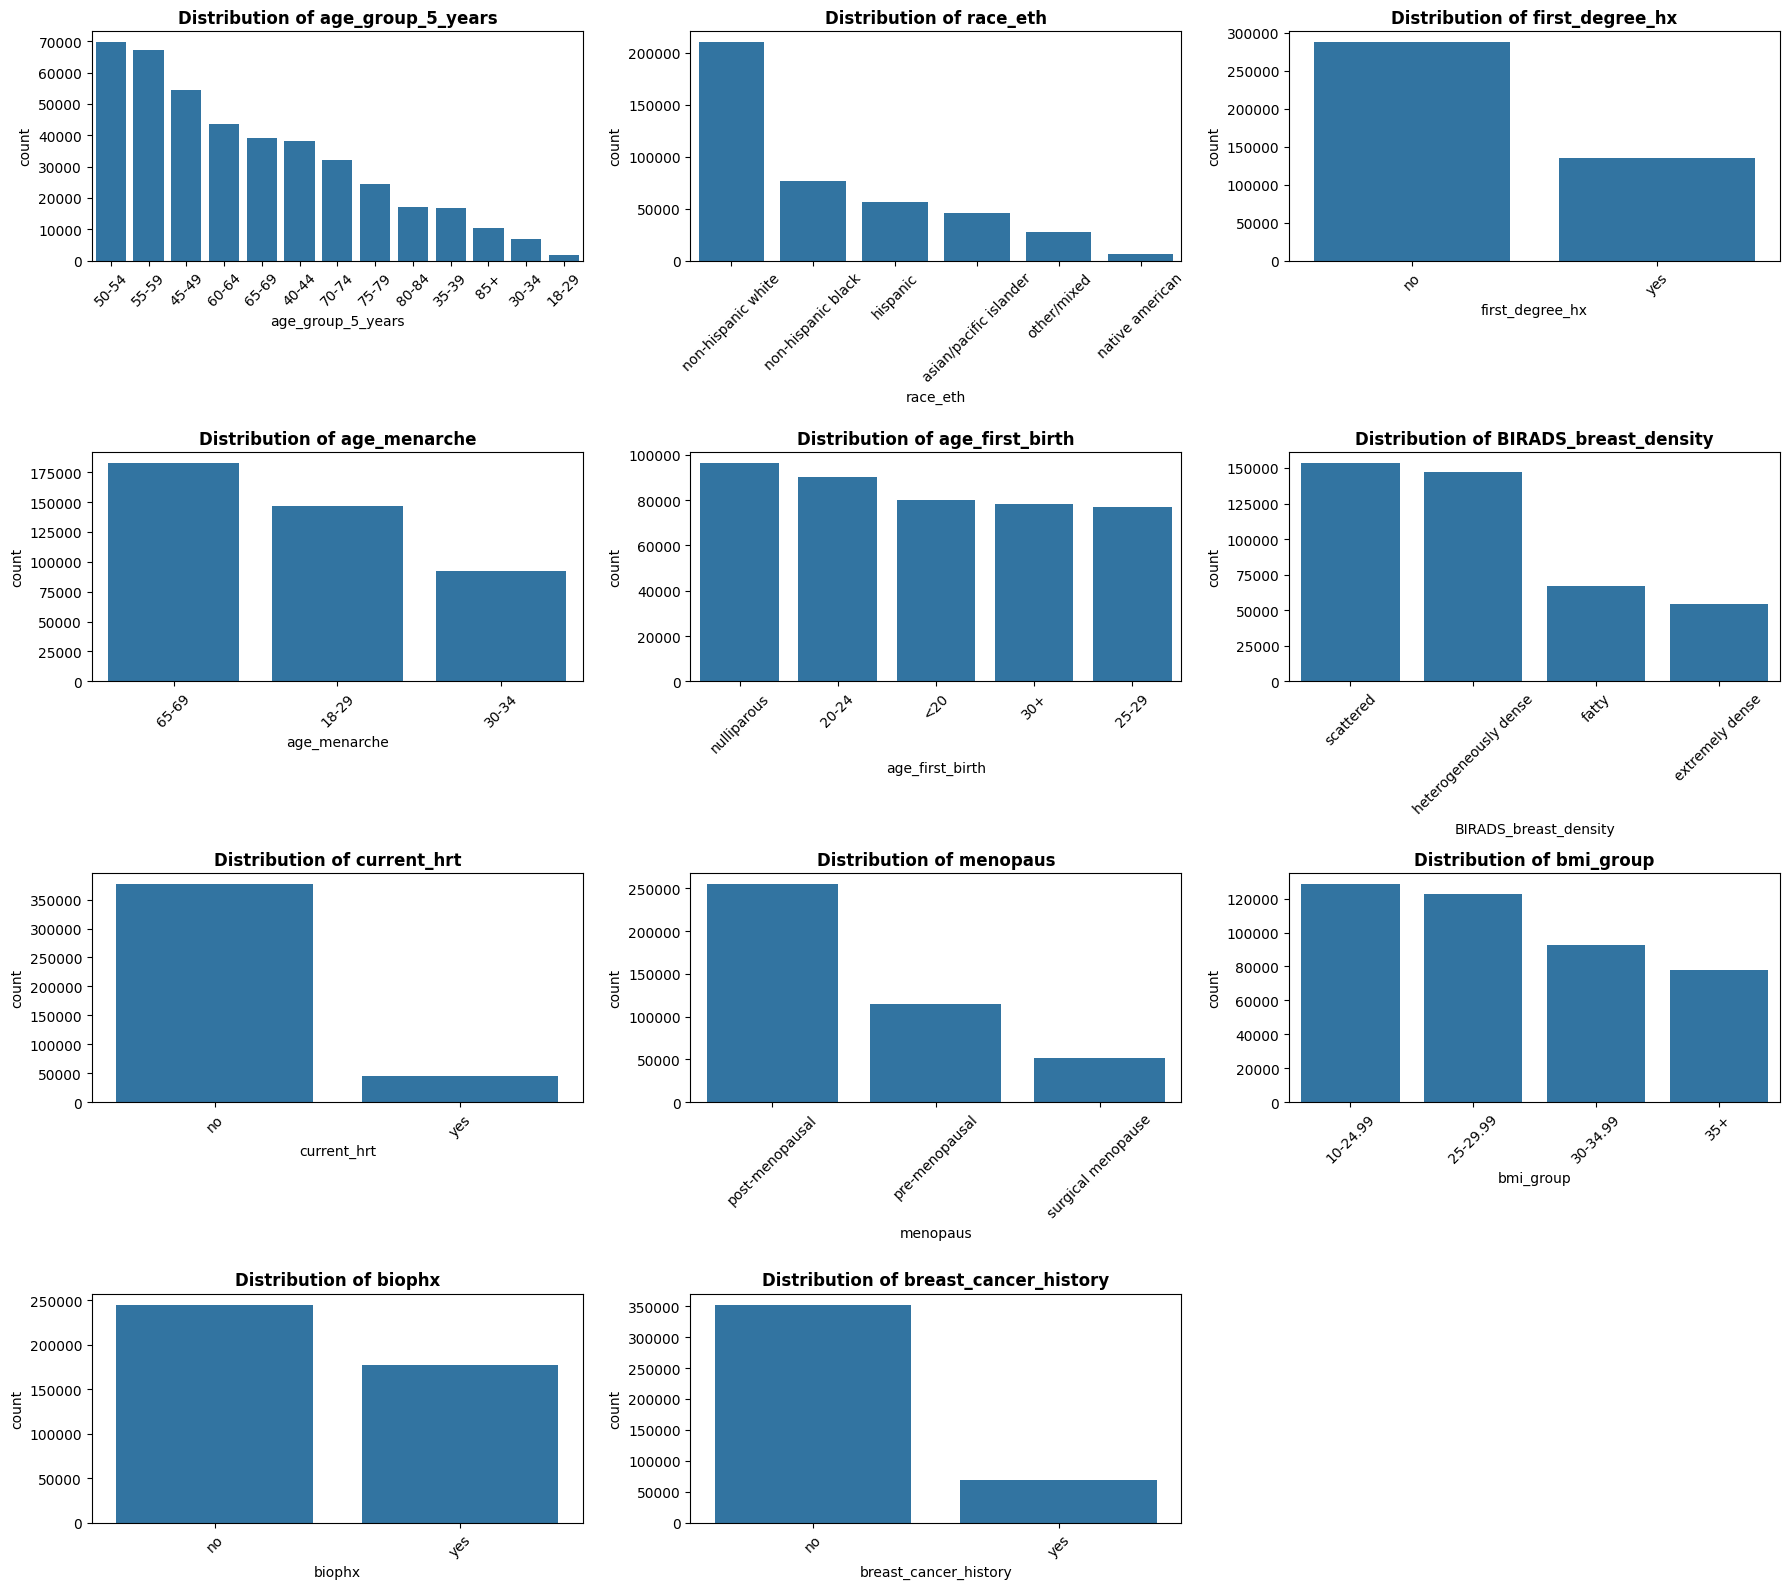

In [ ]:
df_cleaned_agg = df_cleaned.groupby(cat_cols, as_index=False)['count'].sum()
display(df_cleaned_agg.head())

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_cleaned, x=col, ax=axes[i], order=df_cleaned[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Distribution de base, observer s'il y a des catégories qui dominent ou des déséquilibres (beaucoup de femmes post ménopausées,...)

In [ ]:
#calcul proportion femme avec densité mammaire élevée et proportion femme avec un antécédent de cancer
p_birads_high = (df_cleaned['BIRADS_high'] * df_cleaned['count']).sum() / df_cleaned['count'].sum()
p_history = (df_cleaned['breast_cancer_history_bin'] * df_cleaned['count']).sum() / df_cleaned['count'].sum()
print(f'Proportion with high breast density : {p_birads_high:.2%}')
print(f'Proportion with prior breast cancer : {p_history:.2%}')

Proportion with high breast density : 48.88%
Proportion with prior breast cancer : 6.63%


/tmp/ipython-input-4086255362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['BIRADS_high'].mean().reset_index()
/tmp/ipython-input-4086255362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['BIRADS_high'].mean().reset_index()
/tmp/ipython-input-4086255362.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col

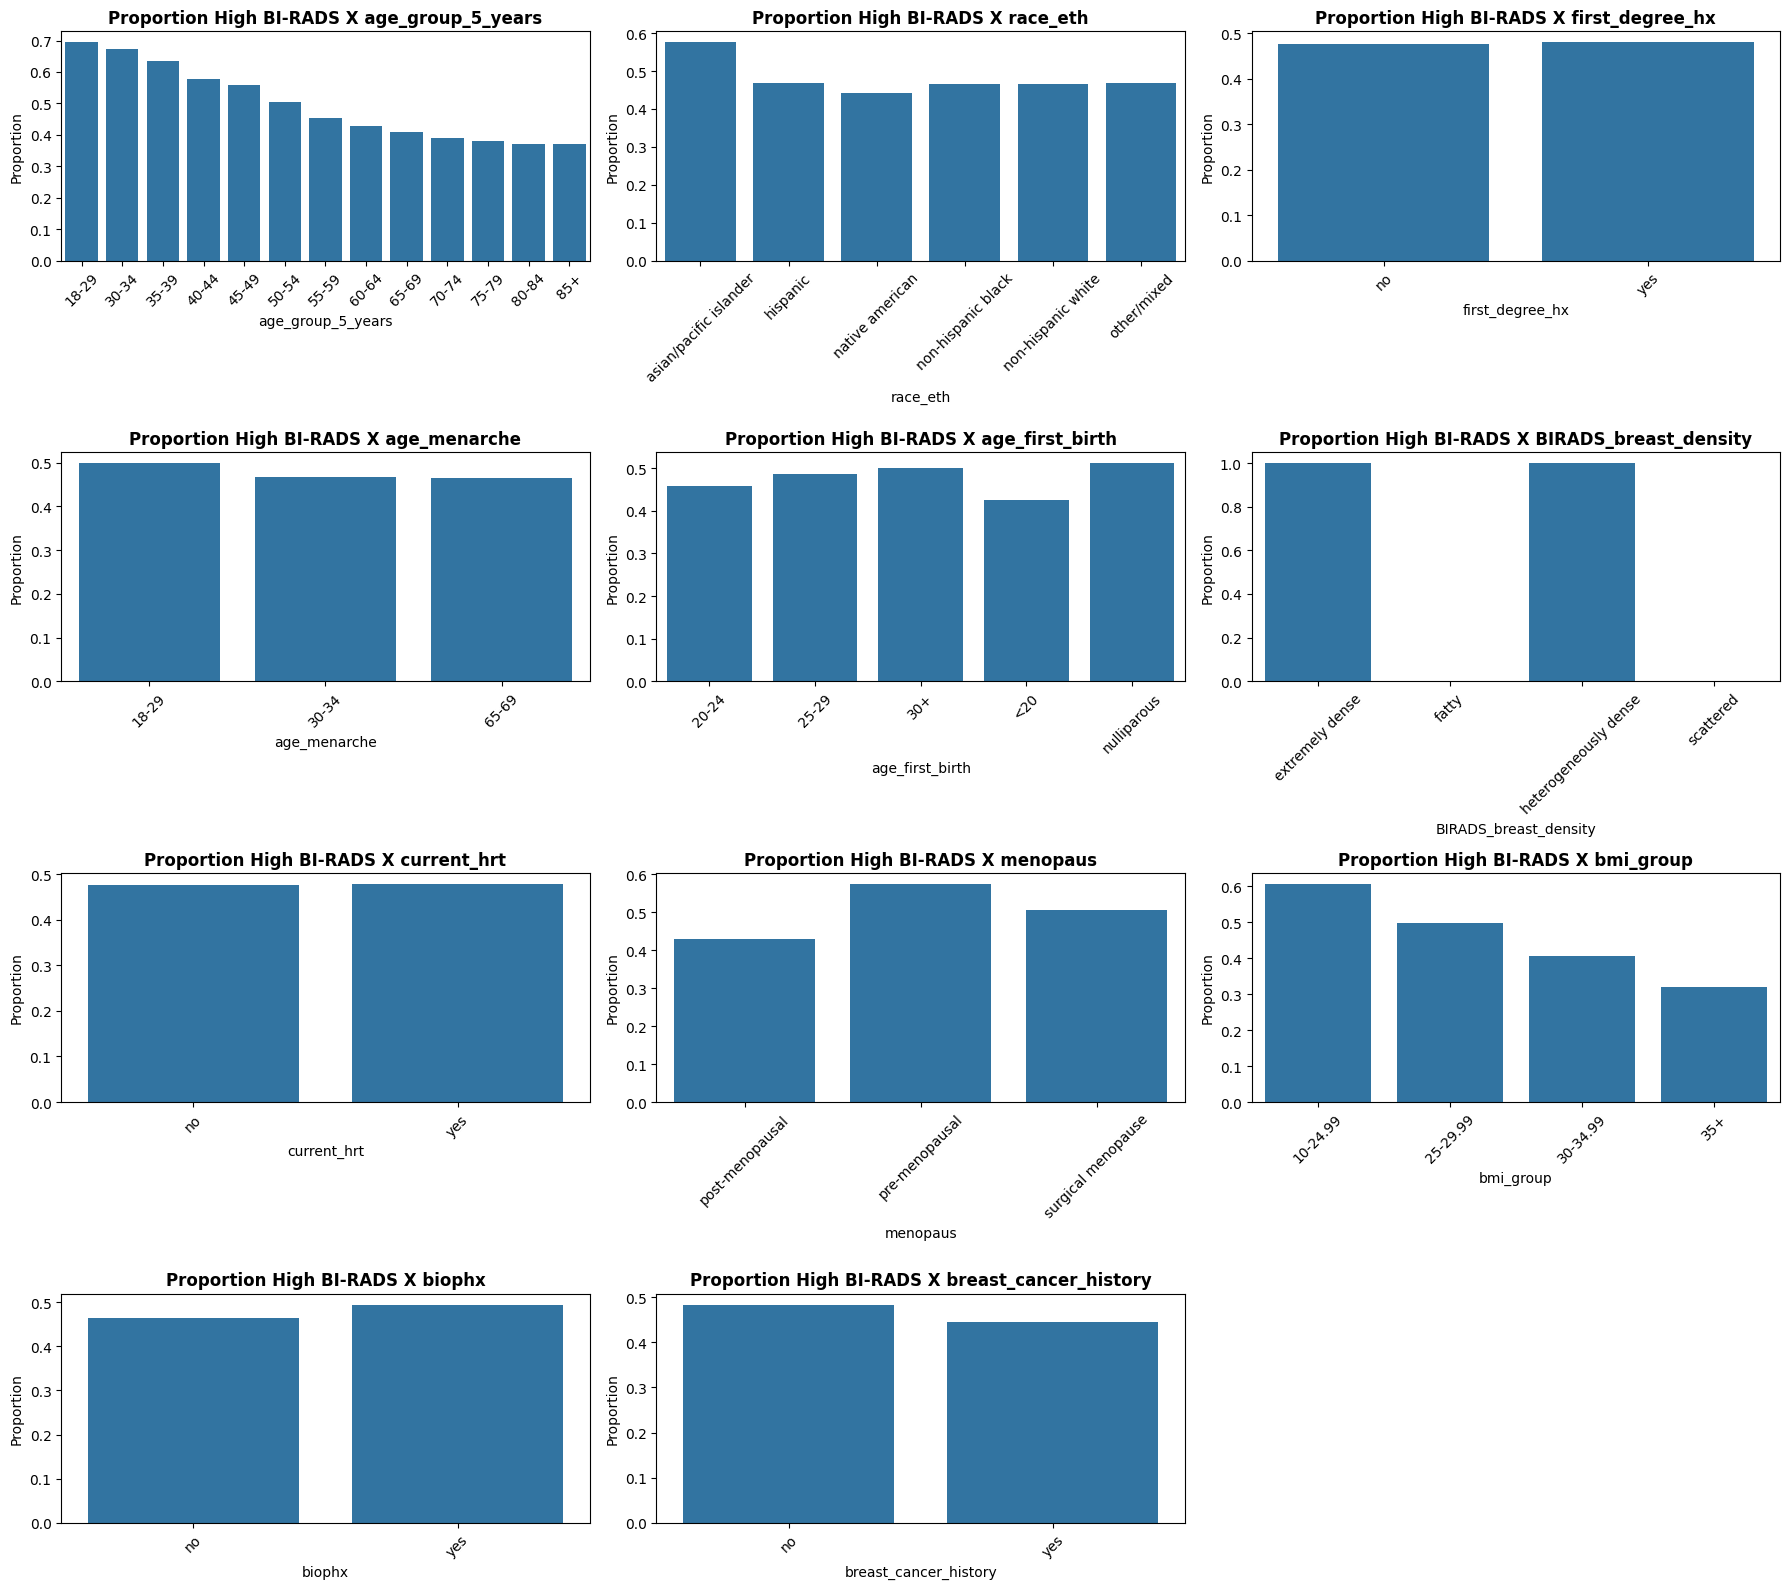

In [ ]:
#Maintenant on veut voir comment les variables explicatives influencent les deux variables cibles (breast_cancer_hisotry et BIRADS_high)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    prop_data = df_cleaned.groupby(col)['BIRADS_high'].mean().reset_index()
    sns.barplot(data=prop_data, x=col, y='BIRADS_high', ax=axes[i])
    axes[i].set_title(f'Proportion High BI-RADS X {col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Proportion')

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-1726444227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['breast_cancer_history_bin'].mean().reset_index()
/tmp/ipython-input-1726444227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df_cleaned.groupby(col)['breast_cancer_history_bin'].mean().reset_index()
/tmp/ipython-input-1726444227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_d

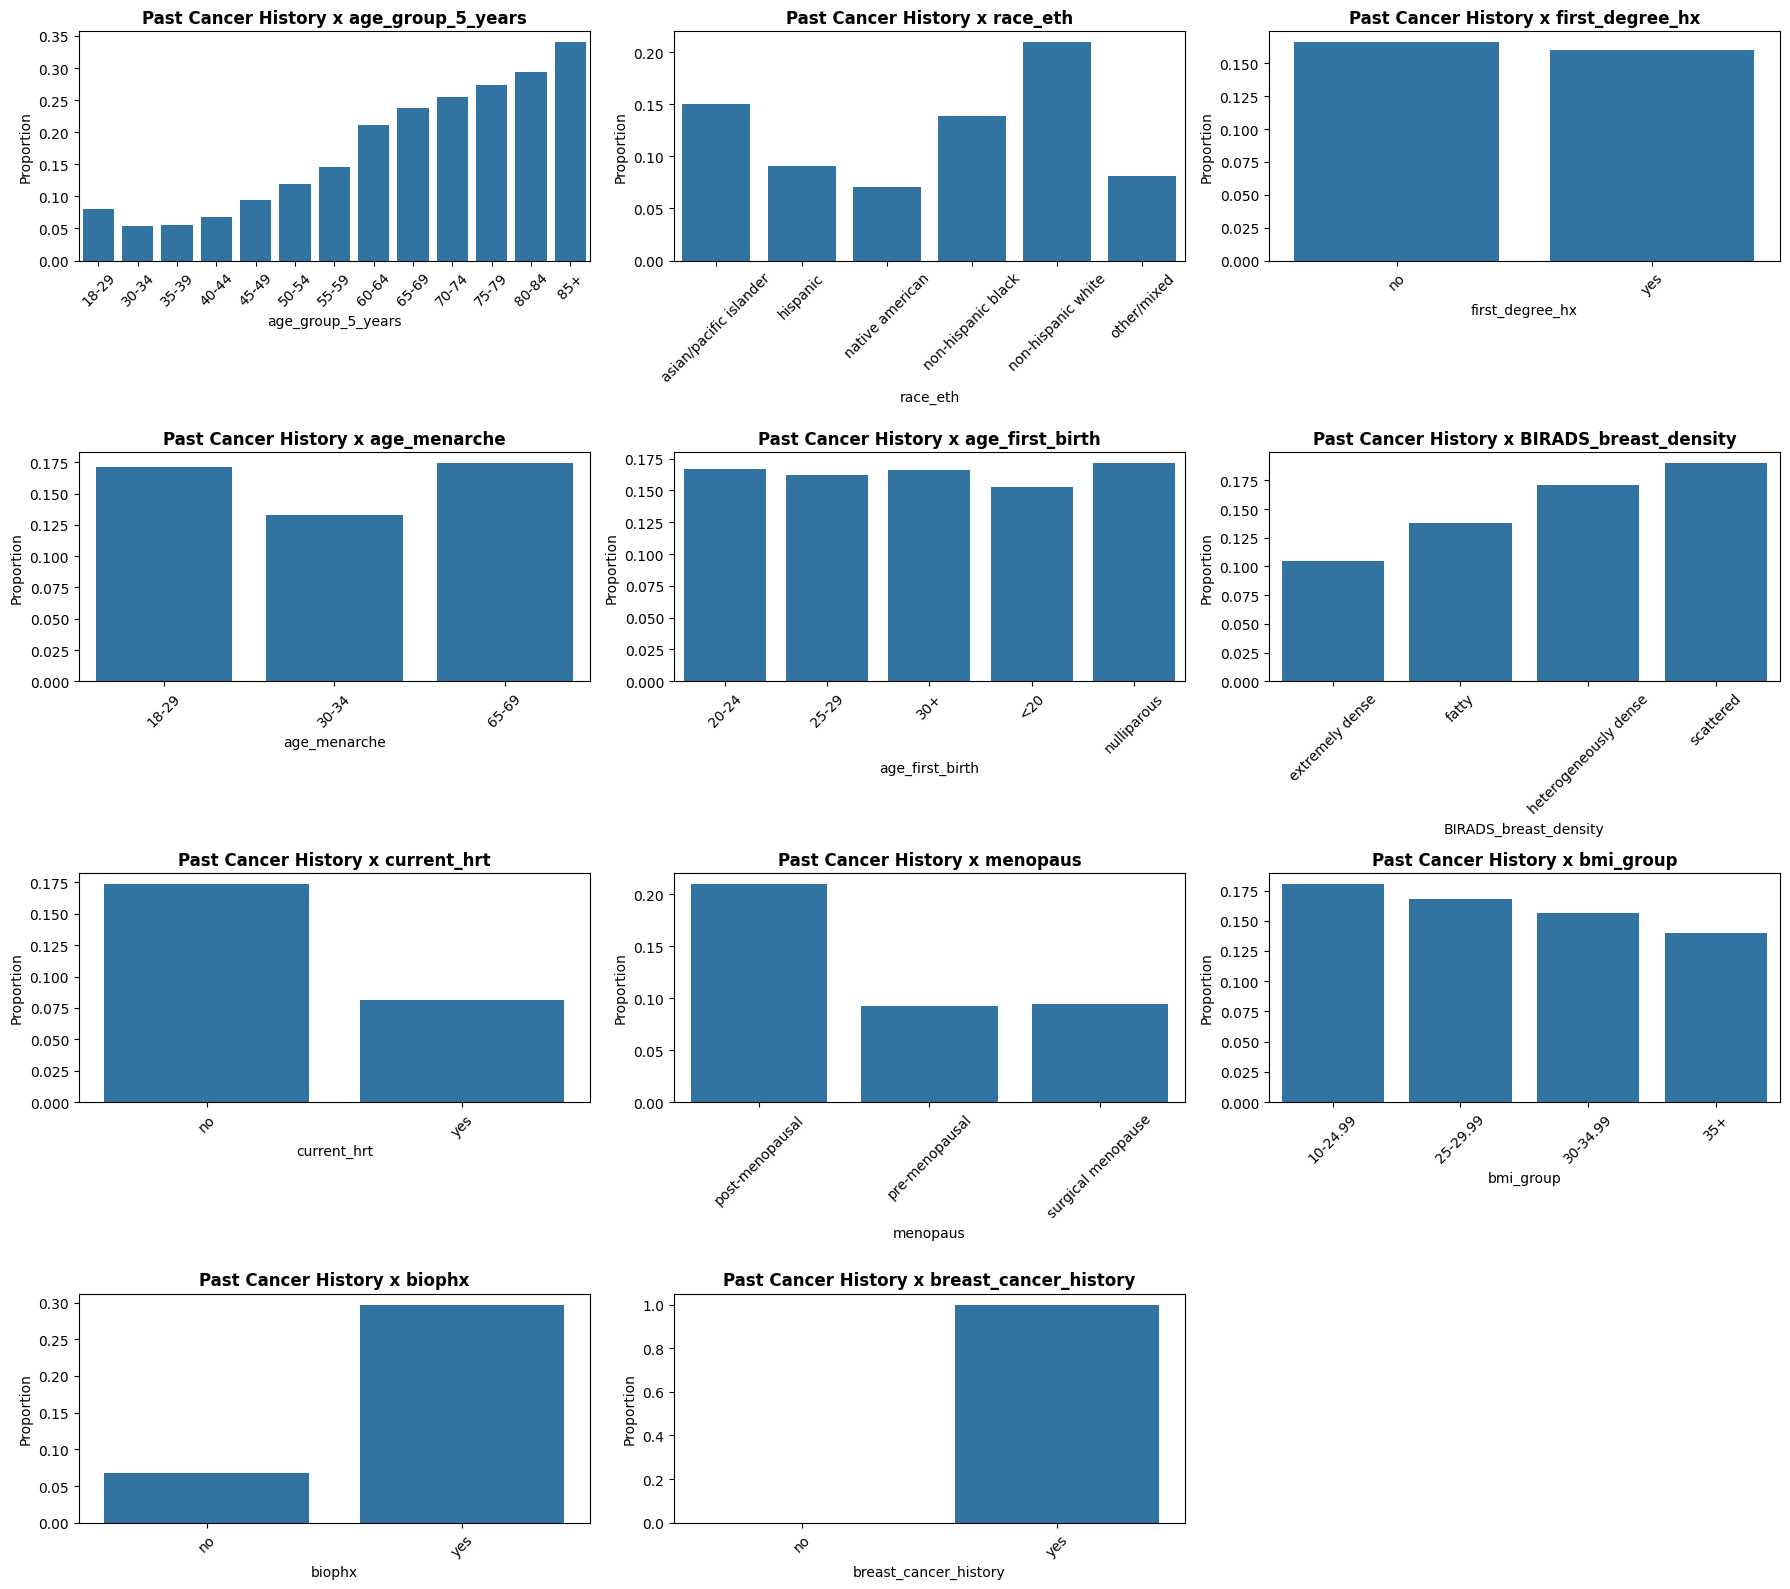

In [ ]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    prop_data = df_cleaned.groupby(col)['breast_cancer_history_bin'].mean().reset_index()
    sns.barplot(data=prop_data, x=col, y='breast_cancer_history_bin', ax=axes[i])
    axes[i].set_title(f'Past Cancer History x {col}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Proportion')

# Supprimer les axes vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

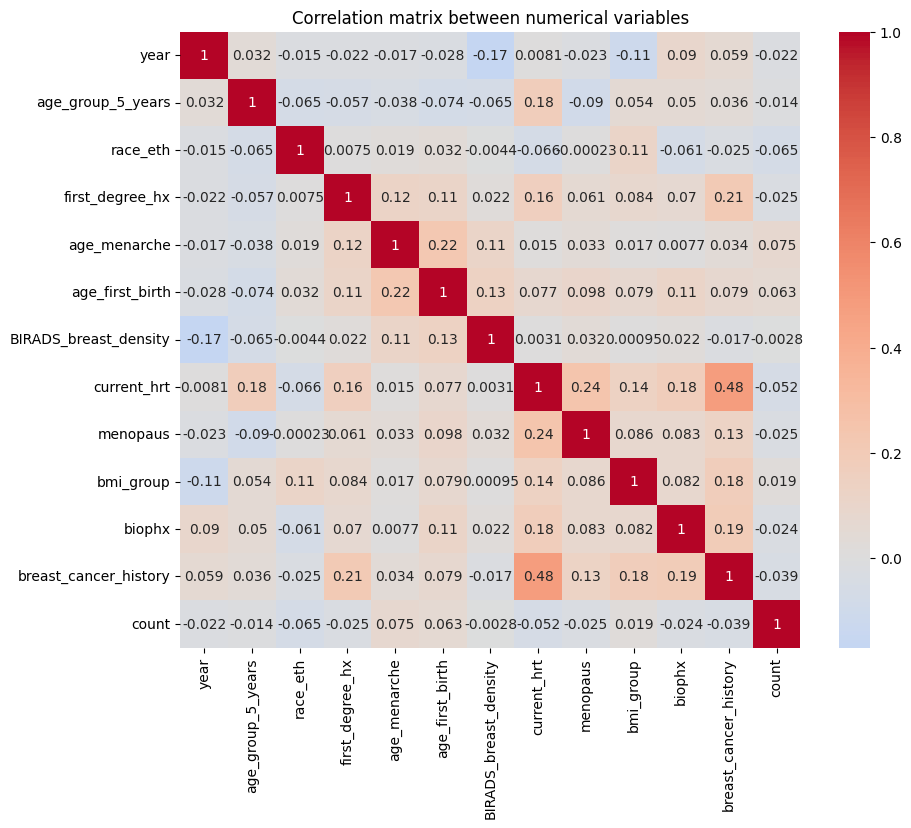

In [ ]:
corr = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between numerical variables')
plt.show()

Corrélations globalement faibles => pas de multicolinéarité forte entre les variables encodées, donc on peut utiliser ces variables pour faire des régressions

corrélations à noter :

*   current_hrt et menopaus : l'hormonothérapie est liée à la ménopause
*   current_hrt et breast_cancer_history : assez élevé, certaines femmes ayant eu un cancer ont pu suivre un traitement hormonal
*  first_degree_hx et breast_cancer_history : antécédents familiaux corrélés aux antécédents personnels
*   age_menarche et age_first_birth : légère corrélation biologique logique






/tmp/ipython-input-2004593411.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_BIRADS = df_cleaned.groupby('year').apply(
/tmp/ipython-input-2004593411.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_history = df_cleaned.groupby('year').apply(


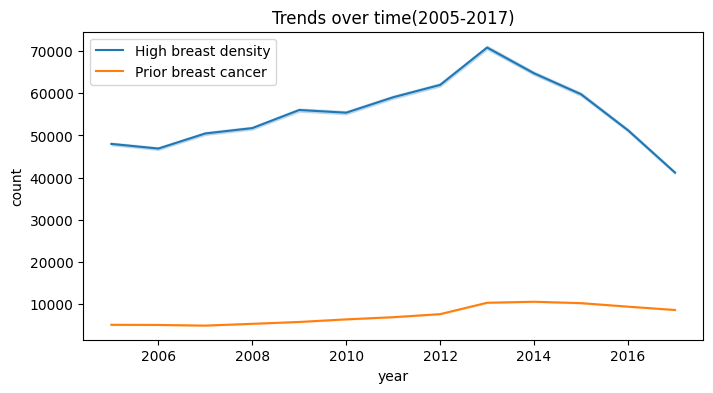

In [ ]:
#voir si il y a des tendances dans le temps
trend_BIRADS = df_cleaned.groupby('year').apply(
    lambda x: (x['BIRADS_high'] * x['count']).sum() / x['count']
).reset_index(name='prop_BIRADS_high')

trend_history = df_cleaned.groupby('year').apply(
    lambda x: (x['breast_cancer_history_bin'] * x['count']).sum() / x['count']
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.lineplot(data=trend_BIRADS, x='year',y='prop_BIRADS_high', label = 'High breast density')
sns.lineplot(data=trend_history, x='year', y='prop_history', label = 'Prior breast cancer')
plt.title('Trends over time(2005-2017)')
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
from google.colab import files

df_encoded.to_csv('df_encoded.csv', index=False)
files.download('df_encoded.csv')

df.to_csv('df.csv', index=False)
files.download('df.csv')

df_cleaned.to_csv('df_cleaned.csv', index=False)
files.download('df_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
df_cleaned.info()
df_cleaned.head(50)

préparation pour regression

In [ ]:

# Création d'une copie du DataFrame original
df_reg = df_cleaned.copy()

# Encodage de age_first_birth : 1 si âge à la première naissance >=30 ou nullipare, sinon 0
df_reg['age_first_birth_bin'] = (
    df_reg['age_first_birth']
    .replace({
        '<20': 0,
        '20-24': 0,
        '25-29': 0,
        '30+': 1,
        'nulliparous': 1
    })
    .astype(int)
)

# Encodage ordinal de bmi_group
bmi_map = {
    '10-24.99': 0,   # normal
    '25-29.99': 1,   # surpoids
    '30-34.99': 2,   # obésité modérée
    '35+': 3         # obésité sévère
}
df_reg['bmi_group_ord'] = df_reg['bmi_group'].map(bmi_map).astype(int)

# Encodage de menopaus : 1 si post-menopausée ou ménopause chirurgicale, sinon 0
df_reg['menopaus_bin'] = (
    df_reg['menopaus']
    .replace({
        'pre-menopausal': 0,
        'post-menopausal': 1,
        'surgical menopause': 1
    })
    .astype(int)
)

# Encodage de first_degree_hx (gestion des minuscules, espaces, catégories)
df_reg['first_degree_hx_bin'] = (
    df_reg['first_degree_hx']
    .astype(str)
    .str.strip().str.lower()
    .replace({'yes': 1, 'no': 0, 'nan': None, 'missing': None})
)
df_reg['first_degree_hx_bin'] = pd.to_numeric(df_reg['first_degree_hx_bin'], errors='coerce').astype('Int64')

# Définition des variables explicatives (X) et de la cible (y)
X = df_reg[['first_degree_hx_bin',
            'age_first_birth_bin',
            'BIRADS_high',
            'bmi_group_ord',
            'menopaus_bin']]

y = df_reg['breast_cancer_history_bin']

# Vérifications rapides
print("Aperçu du DataFrame df_reg :")
print(df_reg.head())

print("\nVariables explicatives (X) :")
print(X.head())

print("\nDistribution de la variable cible (y) :")
print(y.value_counts(normalize=True))


In [ ]:
df_reg.info()

régression test pas vraiment significatif.


In [ ]:

import statsmodels.api as sm

# Sélection des variables explicatives et de la cible
X = df_reg[['first_degree_hx_bin',
            'age_first_birth_bin',
            'BIRADS_high',
            'bmi_group_ord',
            'menopaus_bin']]

y = df_reg['breast_cancer_history_bin']

# Conversion stricte en float64 (et suppression des valeurs manquantes)
X = X.astype(float)
y = y.astype(float)

# Suppression des lignes avec valeurs manquantes
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Ajout d'une constante (intercept)
X = sm.add_constant(X)

# Vérification des types avant le modèle
print("Types des variables après conversion :")
print(X.dtypes)
print("\nDimensions finales :", X.shape)

# Régression logistique
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Résumé des résultats
print(result.summary())


régression avec pondération par sous groupe


In [ ]:
import statsmodels.api as sm


# 1. Créer une version ordinale de la variable d’âge en 5 ans
df_reg['age_group_ord'] = df_reg['age_group_5_years'].cat.codes.astype(float)

# 2. Fonction de régression logistique stratifiée avec contrôle par âge
def run_stratified_logit(df_subset, label):
    print(f"\n=== RÉGRESSION LOGISTIQUE - GROUPE: {label} ===")

    # Variables explicatives
    X = df_subset[['first_degree_hx_bin', 'age_first_birth_bin',
                   'BIRADS_high', 'bmi_high_bin', 'age_group_ord']].astype(float)
    X = sm.add_constant(X)

    # Variable dépendante
    y = df_subset['breast_cancer_history_bin'].astype(float)
    weights = df_subset['count'].astype(float)

    # Modèle logistique pondéré
    model = sm.GLM(y, X, family=sm.families.Binomial(), freq_weights=weights)
    result = model.fit()

    print(result.summary2().tables[1][['Coef.', 'Std.Err.', 'P>|z|', '[0.025', '0.975]']])
    print("\nPseudo R² (McFadden):", 1 - result.deviance / result.null_deviance)
    return result


# 3. Régressions séparées selon les trois statuts ménopausiques
for status in ['pre-menopausal', 'post-menopausal', 'surgical menopause']:
    df_subset = df_reg[df_reg['menopaus'] == status]
    if len(df_subset) > 0:
        run_stratified_logit(df_subset, status)


régression avec interraction a supprimer


Calcul de l’effet du BMI dans chaque sous-groupe à partir du modèle global

In [ ]:
# 7. Calcul des effets du BMI par statut ménopausique à partir du modèle global


# On récupère les coefficients et leur matrice de variance-covariance
params = result_global.params
cov = result_global.cov_params()

# Groupes explicitement présents dans le modèle
bmi_coef = params['bmi_high_bin']

# On crée une fonction pour combiner les effets (BMI + interaction)
def compute_bmi_effect(status_label, interaction_col=None):
    if interaction_col is None:
        beta = bmi_coef
        var = cov.loc['bmi_high_bin', 'bmi_high_bin']
    else:
        beta = bmi_coef + params[interaction_col]
        var = (cov.loc['bmi_high_bin', 'bmi_high_bin']
               + cov.loc[interaction_col, interaction_col]
               + 2 * cov.loc['bmi_high_bin', interaction_col])
    se = np.sqrt(var)
    z = beta / se
    p = 2 * (1 - stats.norm.cdf(abs(z)))
    ci_low, ci_high = beta - 1.96 * se, beta + 1.96 * se
    return {
        'Statut': status_label,
        'Beta_effectif': beta,
        'OR (exp)': np.exp(beta),
        'IC95_basse': np.exp(ci_low),
        'IC95_haute': np.exp(ci_high),
        'p_value': p
    }

from scipy import stats

# Calcul pour les trois statuts
results_bmi = []

# Post-ménopausées = groupe de référence (pas d'interaction)
results_bmi.append(compute_bmi_effect('post-menopausal', None))

# Autres statuts = incluent les termes d'interaction
if 'bmi_x_pre-menopausal' in params:
    results_bmi.append(compute_bmi_effect('pre-menopausal', 'bmi_x_pre-menopausal'))

if 'bmi_x_surgical menopause' in params:
    results_bmi.append(compute_bmi_effect('surgical menopause', 'bmi_x_surgical menopause'))

# Tableau récapitulatif
df_bmi_effects = pd.DataFrame(results_bmi)
print("\n=== Effet du BMI selon le statut ménopausique (calculé à partir du modèle global) ===")
print(df_bmi_effects.to_string(index=False))


In [ ]:
import statsmodels.api as sm


# Préparation des variables
df_reg['age_group_ord'] = df_reg['age_group_5_years'].cat.codes.astype(float)
df_reg['bmi_high_bin'] = df_reg['bmi_group'].map({
    '10-24.99': 0,
    '25-29.99': 0,
    '30-34.99': 1,
    '35+': 1
}).astype(int)

# Variables indicatrices pour le statut ménopausique
menopause_dummies = pd.get_dummies(df_reg['menopaus'], drop_first=True)

# Variables d’interaction BMI × statut ménopausique
for col in menopause_dummies.columns:
    df_reg[f'bmi_x_{col}'] = df_reg['bmi_high_bin'] * menopause_dummies[col]

# Construction du modèle global
X = pd.concat([
    df_reg[['first_degree_hx_bin', 'age_first_birth_bin',
            'BIRADS_high', 'bmi_high_bin', 'age_group_ord']],
    menopause_dummies,
    df_reg[[f'bmi_x_{col}' for col in menopause_dummies.columns]]
], axis=1).astype(float)

X = sm.add_constant(X)
y = df_reg['breast_cancer_history_bin'].astype(float)
weights = df_reg['count'].astype(float)

# Régression logistique pondérée (modèle global)
model_global = sm.GLM(y, X, family=sm.families.Binomial(), freq_weights=weights)
result_global = model_global.fit()

# Résultats principaux
print("\n=== MODÈLE GLOBAL AVEC INTERACTIONS BMI × MÉNOPAUSE ===")
print(result_global.summary2().tables[1][['Coef.', 'Std.Err.', 'P>|z|', '[0.025', '0.975]']])
print("\nPseudo R² (McFadden):", 1 - result_global.deviance / result_global.null_deviance)


But général du code:
Ce script estime un modèle de régression logistique pondérée qui évalue le lien entre le risque de cancer du sein (breast_cancer_history_bin) et plusieurs variables explicatives (âge, IMC, antécédents familiaux, BIRADS, âge à la première naissance), en tenant compte du statut ménopausique et des interactions BMI × ménopause et âge × ménopause.
L’idée est de tester si l’effet de l’IMC (BMI) et de l’âge sur le risque de cancer varie selon le statut ménopausique (pré, post, ou chirurgical).



Structure du modèle estimé
On estime une régression logistique pondérée, soit :
logit(P(Y=1)) = β0
β1(first_degree_hx_bin)
β2(age_first_birth_bin)
β3(BIRADS_high)
β4(bmi_high_bin)
β5(age_group_ord)
β6(pre-menopausal)
β7(surgical menopause)
β8(bmi_high_bin × pre-menopausal)
β9(bmi_high_bin × surgical menopause)
β10(age_group_ord × pre-menopausal)
β11(age_group_ord × surgical menopause)
où :
Y = 1 si antécédent de cancer du sein, 0 sinon.
Les termes d’interaction (β8 à β11) permettent à l’effet de l’IMC (BMI) et de l’âge de différer selon le statut ménopausique (pré, post, chirurgical).

groupe de référence: post-menopausal

In [ ]:

#  MODÈLE GLOBAL AFFINÉ AVEC INTERACTIONS (BMI × MÉNOPAUSE + ÂGE × MÉNOPAUSE)

import statsmodels.api as sm
from scipy import stats

# 1 Préparation des variables
df_reg['age_group_ord'] = df_reg['age_group_5_years'].cat.codes.astype(float)
df_reg['bmi_high_bin'] = df_reg['bmi_group'].map({
    '10-24.99': 0,
    '25-29.99': 0,
    '30-34.99': 1,
    '35+': 1
}).astype(int)

# Variables indicatrices pour le statut ménopausique
menopause_dummies = pd.get_dummies(df_reg['menopaus'], drop_first=True)

# 2 Création des interactions BMI × ménopause
for col in menopause_dummies.columns:
    df_reg[f'bmi_x_{col}'] = df_reg['bmi_high_bin'] * menopause_dummies[col]

# 3 Création des interactions âge × ménopause
for col in menopause_dummies.columns:
    df_reg[f'age_x_{col}'] = df_reg['age_group_ord'] * menopause_dummies[col]

# 4 Construction du modèle global complet
X_full = pd.concat([
    df_reg[['first_degree_hx_bin', 'age_first_birth_bin', 'BIRADS_high',
            'bmi_high_bin', 'age_group_ord']],
    menopause_dummies,
    df_reg[[f'bmi_x_{col}' for col in menopause_dummies.columns]],
    df_reg[[f'age_x_{col}' for col in menopause_dummies.columns]]
], axis=1).astype(float)

X_full = sm.add_constant(X_full)
y = df_reg['breast_cancer_history_bin'].astype(float)
weights = df_reg['count'].astype(float)

# 5 Modèle complet (avec toutes les interactions)
model_full = sm.GLM(y, X_full, family=sm.families.Binomial(), freq_weights=weights)
result_full = model_full.fit()

print("\n=== MODÈLE GLOBAL AFFINÉ : BMI×MÉNOPAUSE + ÂGE×MÉNOPAUSE ===")
print(result_full.summary2().tables[1][['Coef.', 'Std.Err.', 'P>|z|', '[0.025', '0.975]']])
print("\nPseudo R² (McFadden):", 1 - result_full.deviance / result_full.null_deviance)

# 6 Modèle réduit (sans interactions BMI ni âge)
X_reduced = pd.concat([
    df_reg[['first_degree_hx_bin', 'age_first_birth_bin', 'BIRADS_high',
            'bmi_high_bin', 'age_group_ord']],
    menopause_dummies
], axis=1).astype(float)

X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.GLM(y, X_reduced, family=sm.families.Binomial(), freq_weights=weights)
result_reduced = model_reduced.fit()

# 7 Test global des interactions (Likelihood Ratio Test)
LLR = 2 * (result_full.llf - result_reduced.llf)
df_diff = result_full.df_model - result_reduced.df_model
p_val = 1 - stats.chi2.cdf(LLR, df_diff)
print(f"\n=== TEST GLOBAL DES INTERACTIONS ===")
print(f"Chi² = {LLR:.2f} (ddl = {df_diff}),  p = {p_val:.4g}")

# 8 Estimation de l’effet du BMI selon le statut ménopausique
params = result_full.params
cov = result_full.cov_params()

def compute_bmi_effect(group_name, base_var='bmi_high_bin'):
    if group_name == 'post-menopausal':  # référence
        beta = params[base_var]
        var = cov.loc[base_var, base_var]
    elif group_name == 'pre-menopausal':
        beta = params[base_var] + params['bmi_x_pre-menopausal']
        var = (cov.loc[base_var, base_var] +
               cov.loc['bmi_x_pre-menopausal', 'bmi_x_pre-menopausal'] +
               2 * cov.loc[base_var, 'bmi_x_pre-menopausal'])
    elif group_name == 'surgical menopause':
        beta = params[base_var] + params['bmi_x_surgical menopause']
        var = (cov.loc[base_var, base_var] +
               cov.loc['bmi_x_surgical menopause', 'bmi_x_surgical menopause'] +
               2 * cov.loc[base_var, 'bmi_x_surgical menopause'])
    else:
        raise ValueError("Statut ménopausique non reconnu.")

    se = np.sqrt(var)
    ci_low, ci_high = beta - 1.96*se, beta + 1.96*se
    return {
        'Statut ménopausique': group_name,
        'β_BMI_effectif': beta,
        'OR (exp(β))': np.exp(beta),
        'IC95% bas': np.exp(ci_low),
        'IC95% haut': np.exp(ci_high)
    }

bmi_effects = pd.DataFrame([
    compute_bmi_effect('post-menopausal'),
    compute_bmi_effect('pre-menopausal'),
    compute_bmi_effect('surgical menopause')
])

print("\n=== Effet du BMI selon le statut ménopausique (modèle affiné) ===")
print(bmi_effects.to_string(index=False))


1) Test global des interactions
Le test du Chi² (207.95, ddl = 4, p < 0.001) indique que les interactions entre le BMI et le statut ménopausique, ainsi qu’entre l’âge et le statut ménopausique, améliorent significativement la qualité du modèle. Cela suggère que l’effet du BMI et de l’âge sur le risque de cancer du sein diffère selon le statut ménopausique.

2) Interprétation des effets principaux
Les facteurs les plus significativement associés à un antécédent de cancer du sein sont les antécédents familiaux au premier degré (β = 0.31, p < 0.001), l’âge à la première naissance plus tardif (β = 0.21, p < 0.001), la densité mammaire élevée (BIRADS_high, β = 0.07, p < 0.001) et l’âge chronologique (β = 0.30, p < 0.001). Ces associations sont positives, ce qui signifie qu’elles augmentent la probabilité d’avoir un antécédent de cancer du sein.

3) Interprétation des interactions
Les interactions montrent que l’effet du BMI varie selon le statut ménopausique. L’association entre BMI élevé et cancer du sein est légèrement positive chez les femmes post-ménopausées (effet de référence), mais négative chez les femmes préménopausées (β d’interaction = -0.18) et chez celles ayant une ménopause chirurgicale (β = -0.26). De même, l’effet de l’âge tend à être plus faible chez les femmes préménopausées et plus marqué chez les femmes ménopausées chirurgicalement.

4) Effet du BMI par statut ménopausique
Chez les femmes post-ménopausées, un BMI élevé est associé à une augmentation modérée du risque (OR = 1.07, IC95% [1.05–1.08]). Chez les femmes préménopausées, l’effet est inverse, suggérant une diminution du risque (OR = 0.89, IC95% [0.86–0.92]). Enfin, chez les femmes ménopausées chirurgicalement, le BMI élevé est également associé à un risque plus faible (OR = 0.82, IC95% [0.78–0.87]). Ces différences confirment l’existence d’un effet différentiel du BMI selon le statut hormonal.

création des nouvelles intéractions et ajout de current_hrt:

In [ ]:
# ================================
# Encodage HRT
# ================================
df_reg['current_hrt_bin'] = df_reg['current_hrt'].map({'yes': 1, 'no': 0}).astype(float)
df_reg['current_hrt_bin'] = df_reg['current_hrt_bin'].fillna(0)

# Conversion indispensable
menopause_dummies = menopause_dummies.astype(float)



# Interactions densité


# BMI × densité
df_reg['bmi_x_density'] = df_reg['bmi_high_bin'].astype(float) * df_reg['BIRADS_high'].astype(float)

# Âge × densité
df_reg['age_x_density'] = df_reg['age_group_ord'].astype(float) * df_reg['BIRADS_high'].astype(float)

# Densité × ménopause
density_x_meno = {}
for col in menopause_dummies.columns:
    name = f'density_x_{col}'
    df_reg[name] = df_reg['BIRADS_high'].astype(float) * menopause_dummies[col]
    density_x_meno[col] = name


# Interactions HRT


# HRT × ménopause
hrt_x_meno = {}
for col in menopause_dummies.columns:
    name = f'hrt_x_{col}'
    df_reg[name] = df_reg['current_hrt_bin'] * menopause_dummies[col]
    hrt_x_meno[col] = name

# HRT × densité
df_reg['hrt_x_density'] = df_reg['current_hrt_bin'] * df_reg['BIRADS_high'].astype(float)



New modèle avec new interacton:

In [ ]:
# ============================================
#   X_full2 — Modèle complet final
#   avec densité + BMI + âge + ménopause + HRT
# ============================================

X_full2 = pd.concat([
    # Variables principales
    df_reg[['first_degree_hx_bin', 'age_first_birth_bin',
            'BIRADS_high', 'bmi_high_bin', 'age_group_ord',
            'current_hrt_bin']],

    # Ménopause (dummy)
    menopause_dummies,

    # BMI × ménopause
    df_reg[[f'bmi_x_{col}' for col in menopause_dummies.columns]],

    # Âge × ménopause
    df_reg[[f'age_x_{col}' for col in menopause_dummies.columns]],

    # Nouvelles interactions densité
    df_reg[['bmi_x_density', 'age_x_density']],

    # Densité × ménopause
    df_reg[list(density_x_meno.values())],

    # Interaction HRT × densité (seule interaction HRT valide)
    df_reg[['hrt_x_density']]

], axis=1).astype(float)

# Ajouter constante
X_full2 = sm.add_constant(X_full2)

# Variable dépendante + pondération
y = df_reg['breast_cancer_history_bin'].astype(float)
weights = df_reg['count'].astype(float)

# Modèle final GLM binomial
model_full2 = sm.GLM(y, X_full2, family=sm.families.Binomial(), freq_weights=weights)
result_full2 = model_full2.fit()

# SORTIE
print("=== MODELE GLOBAL X_full2 AVEC HRT + INTERACTIONS DENSITE ===")
print(result_full2.summary2().tables[1][['Coef.', 'Std.Err.', 'P>|z|', '[0.025', '0.975]']])

# Pseudo R² McFadden
pseudo_R2 = 1 - result_full2.deviance / result_full2.null_deviance
print("\nPseudo R² (McFadden):", pseudo_R2)

# Chi² global du modèle
chi2_model = result_full2.null_deviance - result_full2.deviance
df_model = result_full2.df_model
p_chi2 = 1 - stats.chi2.cdf(chi2_model, df_model)

print("\nChi² global du modèle :", chi2_model)
print("ddl :", df_model)
print("p-value :", p_chi2)



In [ ]:
print(df_reg.groupby(['menopaus', 'current_hrt']).size())


1)Structure générale du modèle
Le modèle inclut les prédicteurs classiques (antécédents familiaux, âge à la première naissance, BMI, âge, densité mammaire, statut ménopausique), ainsi que les interactions BMI × ménopause, âge × ménopause, densité × ménopause, et un nouveau bloc avec l’hormonothérapie actuelle (current_hrt_bin) et l’interaction hrt × densité. Comme toutes les utilisatrices d’hormonothérapie dans les données sont exclusivement post-ménopausées, l’effet estimé pour current_hrt_bin doit être interprété dans ce contexte particulier plutôt qu’en termes biologiques purs.

2)Effets principaux
Les associations les plus fortes restent celles déjà observées : antécédents familiaux au premier degré (β ≈ 0.31), âge plus avancé à la première naissance (β ≈ 0.22) et âge chronologique (β ≈ 0.29), toutes très significatives. La densité mammaire élevée conserve un effet positif (β ≈ 0.10), indiquant qu’elle est associée à une probabilité plus élevée d’antécédent de cancer du sein. Le BMI seul présente un effet faible et non significatif dans ce modèle élargi, ce qui est attendu lorsque plusieurs interactions sont incluses.

3)Effet de l’hormonothérapie actuelle (current_hrt_bin)
Le coefficient de l’hormonothérapie est négatif et de grande amplitude (β ≈ -0.70). Cet effet reflète principalement la structure de l’échantillon et non un effet protecteur réel. Les femmes utilisant une hormonothérapie dans la base sont exclusivement des femmes en post-ménopause récente, généralement plus jeunes que l’ensemble des femmes post-ménopausées. Comme l’âge est un déterminant majeur du risque, cette différence de distribution produit un coefficient négatif dans le modèle ajusté. Ce résultat n’indique donc pas un effet causal inverse, mais un effet de composition des données.

4)Interactions avec la densité
La densité mammaire interagit à la fois avec le statut ménopausique et avec l’hormonothérapie. Les coefficients d’interaction densité × préménopause et densité × ménopause chirurgicale sont négatifs, indiquant que l’association entre densité élevée et risque de cancer est moins marquée dans ces sous-groupes que chez les femmes post-ménopausées. L’interaction hrt × densité est également négative (β ≈ -0.39), ce qui suggère que chez les femmes sous hormonothérapie, l’effet de la densité élevée est atténué par rapport aux non-utilisatrices. Là encore, cette atténuation doit être interprétée avec prudence, car elle reflète probablement l’âge et la distribution spécifique des utilisatrices dans l’échantillon.

5)Ajustement global du modèle
Le modèle complet fournit un pseudo-R² de McFadden d’environ 0.084, indiquant une amélioration modérée mais réelle de la qualité de l’ajustement par rapport aux modèles précédents. Le Chi² global (≈ 95 443, p < 0.001) montre que l’ensemble des prédicteurs retenus contribue significativement à expliquer la variabilité de la probabilité d’avoir un antécédent de cancer du sein.